In [7]:
# convolution example
import tensorflow as tf
import numpy as np

# image의 형태
# 1장의 이미지는 3차원 형태의 데이터
# (이미지의 개수, width, height, color) => 4차원 배열
# (1,3,3,1)

image= np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)

# filter 준비 (Weight) 
# (width, height, color,필터의 개수) => 4차원 배열
# (2,2,1,1)
weight = np.array([[[[1,-5,10]],
                   [[1,-5,10]]],
                  [[[1,-5,10]],
                   [[1,-5,10]]]])

print(weight.shape)

# stride 지정 (사실 2차원이면 되는데 image와 filter와의 행렬 연산 때문에 4차원으로 지정함)
# (1, stride width, stride height, 1) => 4차원 배열 (0,3번의 1은 dummy 값)
# stride = [1,1,1,1]

# stride만큼 움직이며 filter와 convolution 계산하고 새로운 image( 결과 layer ) 즉, activation map이 return 됨
# 해당 image의 특징을 가지고 있는 layer 생성됨
# padding = "VALID" : 크기 줄어듦
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding = "VALID")
print(conv2d.shape)


(2, 2, 1, 3)
(1, 2, 2, 3)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


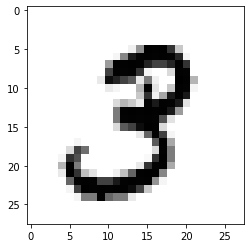

(5, 14, 14, 1)


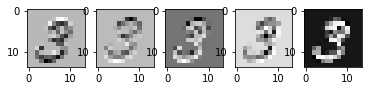

In [28]:
## CNN
## MNIST 예제를 이용해서 하나의 이미지에 대한 Convolution Image 5개를 생성해보자
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

# data loading
mnist = input_data.read_data_sets("./data/mnist",
                                 one_hot=True)

# 학습용 training image 중 2번째 image의 정보를 1차원 형태의 데이터로 얻어옴
img = mnist.train.images[1]

# 2차원 형태의 데이터로 변환
img = img.reshape(28,28)
plt.imshow(img, cmap= "Greys",interpolation ="nearest")
plt.show()

# 해당 이미지를 convolution 이미지로 변형
# 2차원 형태의 img를 4차원 형태의 img로 변환
img = img.reshape(-1,28,28,1)

# image 준비 완료
# ------------------------------------------------------------------------------------------------------
# filter 준비
# 5개의 filter를 이용, 2x2짜리 filter 이용
# 결과 image 크기에 영향을 미치는 2가지 : filter의 가로, 세로와 stride의 개수
# filter shape => (2,2,1,5)
W = tf.Variable(tf.random_normal([2,2,1,5]), name = "filter")
# padding = "SAME" : 원본 크기 유지

conv2d = tf.nn.conv2d(img, W,strides = [1,2,2,1],padding = "SAME")

# convolution 결과
# print(conv2d.shape) => (1, 14, 14, 5) : 14 x 14짜리 image가 5개 생성 됨

# 새로 생성된 image를 plt를 이용해서 확인
sess = tf.Session()
sess.run(tf.global_variables_initializer())
conv2d = sess.run(conv2d)

# np.swapaxes(배열,바꿀 index1, 바꿀 index2) : 배열의 축을 임의로 변경
# (1, 14, 14, 5) => (5, 14, 14, 1)
# 반복문을 돌려서 데이터를 편하게 추출하기 위해 축 변경
conv2d = np.conv2d = np.swapaxes(conv2d,0,3)
print(conv2d.shape) 

# plt.subplots() : 그림 여러개 그리는 함수

# 1행 5열짜리 subplot 생성 : 5개의 그림을 1줄에 그림
# fig : subplot 전체 지칭
# axes[0]: subplot 시작 ~ fig.axes[4] : subplot 끝 
fig,axes = plt.subplots(1,5)

for idx, item in enumerate(conv2d):
    axes[idx].imshow(item.reshape(14,14),cmap="Greys") # 3차원 배열을 2차원 배열로 변환
plt.show()

# convolution한 5개의 image(크기가 작아지고 다양해진 image)를 가지고 학습하기 때문에 학습이 더 잘 됨

# Convolution만 하면 값 & 크기가 커지기 때문에         => 입력 데이터가 커짐, 시간 오래 걸림
# relu 함수를 취해서 0~1.xx의 범위 내로 값을 줄여주고
# Pooling(Sampling)으로 크기를 줄이고 특징을 살려줌 

# Convolution을 너무 많이 하면 특징이 흐려지기 때문에 적당히!



In [40]:
%%time
## MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# 0. 그래프 초기화
tf.reset_default_graph()

# 1. Data Loading & Data 정제
mnist = input_data.read_data_sets("./data/mnist",one_hot=True)

# 2. placeholder 설정
X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32)
drop_rate = tf.placeholder(dtype = tf.float32)

# 3. Convolution 
# 3-1. Convolution layer 1
x_img = tf.reshape(X, [-1,28,28,1])
W1 = tf.Variable(tf.random_normal([2,2,1,32]), name= "filter1")

L1 = tf.nn.conv2d(x_img, W1, strides=[1,2,2,1],padding = "SAME")
print(L1.shape) # => (?, 14, 14, 32)
L1 = tf.nn.relu(L1)
# tf.nn.max_pool(대상Layer, ksize = kernel size [dummy,행,열,dummy], strides = [dummy,행,열,dummy], padding )
L1 = tf.nn.max_pool(L1, ksize= [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
print(L1.shape) # => (?, 7, 7, 32)

# convolution한 결과 : 28 x 28의 원본 이미지 1장이 7 x 7 convolution 된 이미지 32장으로 바뀜

# 3-2. Convolution layer 2

# L1.shape = (?, 14, 14, 32)의 3번 index 값과 tf.random_normal([3,3,32,32])의 2번 index의 값이 같아야 함
W2 = tf.Variable(tf.random_normal([3,3,32,64]), name= "filter2")
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1],padding = "SAME")
print(L2.shape)
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize= [1,1,1,1], strides = [1,1,1,1], padding = "SAME")
print(L2.shape)
# convolution한 결과 : 28 x 28의 원본 이미지 1장이 7 x 7 convolution 된 이미지 64장으로 바뀜

# Neural network를 이용하려면 2차원 형태로 변환해줘야 함
L2 = tf.reshape(L2, [-1,7*7*64])

# 4.Neural Network
# 4.1 Weight & bias
# shape=["컬럼수",256]
W3 = tf.get_Variable("weight3",shape=[7*7*64, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(shape=[256], name = "bias3")

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 7, 7, 64)
(?, 7, 7, 64)
Wall time: 840 ms
